In [1]:
#import library
import sys
import os
import numpy as np # type: ignore
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
sys.path.append('../../scripts')

#import quantitative_analysis as qan
import EDA as eda
import sentimentAnalysis as san

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tsegaye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tsegaye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tsegaye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
news_data = eda.LoadData("../../data/raw_analyst_ratings.csv")
stock_data = eda.LoadData("../../data/yfinance_data/GOOG_historical_data.csv")

In [3]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


Date Conversion

In [5]:
# Convert 'date' column in news data and 'Date' column in stock data to datetime
news_data = eda.ConvertDdate(news_data, "date" )
stock_data = eda.ConvertDdate(stock_data, "Date")

In [6]:
# Filter stock data to match the date range of news data
start_date = news_data['date'].min()
end_date = news_data['date'].max()
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]

In [ ]:
# Sentiment analysis
news_data['sentiment_score'] = news_data['headline'].apply(san.GetSentimentScore)
news_data['sentiment'] = news_data['sentiment_score'].apply(san.ClassifySentiment)

In [ ]:
# Calculate daily returns for stock
stock_data['daily_return'] = stock_data['Close'].pct_change()

# Rename columns to avoid conflicts
news_data.rename(columns={'date': 'Date'}, inplace=True)

In [ ]:
# Merge news data with stock data on Date
combined_data = pd.merge(stock_data, news_data, on='Date', how='left')

In [ ]:
# Aggregate sentiment scores by date
daily_sentiment = combined_data.groupby('Date')['sentiment_score'].mean().reset_index()
daily_sentiment.rename(columns={'sentiment_score': 'average_sentiment_score'}, inplace=True)

In [ ]:
# Merge aggregated sentiment with combined data
final_data = pd.merge(combined_data, daily_sentiment, on='Date', how='left')
final_data = final_data[['Date', 'average_sentiment_score', 'Close', 'daily_return']]
final_data.head()

,Date,average_sentiment_score,Close,daily_return
0,2009-02-17,NaN,3.0835,NaN
1,2009-02-18,NaN,3.1175,0.011026
2,2009-02-19,NaN,3.0975,-0.006415
3,2009-02-20,NaN,3.1930,0.030831
4,2009-02-23,NaN,3.0855,-0.033667


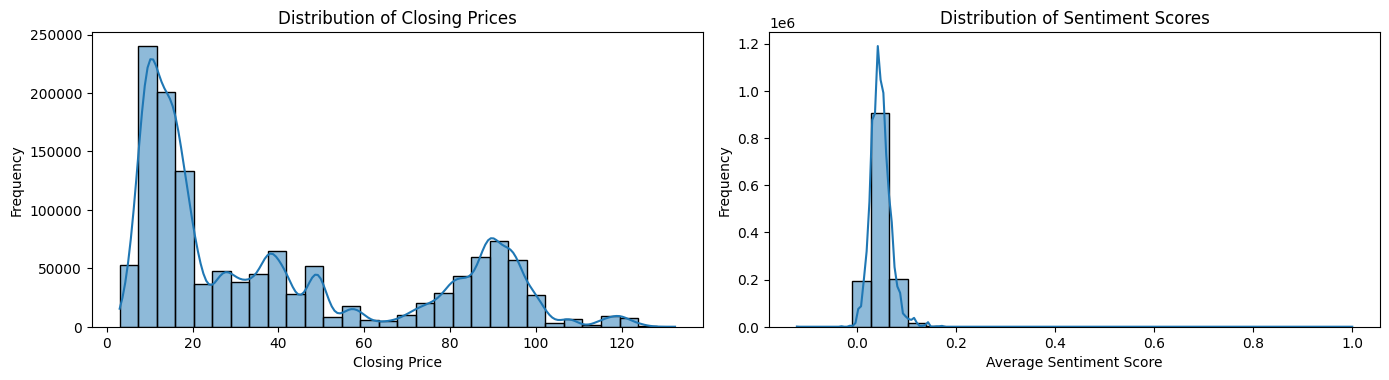

In [ ]:
# Data visualization
eda.PlotDistributions(final_data)

In [ ]:
# Calculate correlation between sentiment and daily return
correlation_return = final_data[['average_sentiment_score', 'daily_return']].corr().iloc[0, 1]
print(f"Correlation between sentiment and daily return: {correlation_return}")

Correlation between sentiment and daily return: 0.05268041741434255


In [ ]:
# Calculate correlation between sentiment and closing price
correlation_close = final_data[['average_sentiment_score', 'Close']].corr().iloc[0, 1]
print(f"Correlation between sentiment and closing price: {correlation_close}")

Correlation between sentiment and closing price: -0.2009917856006067


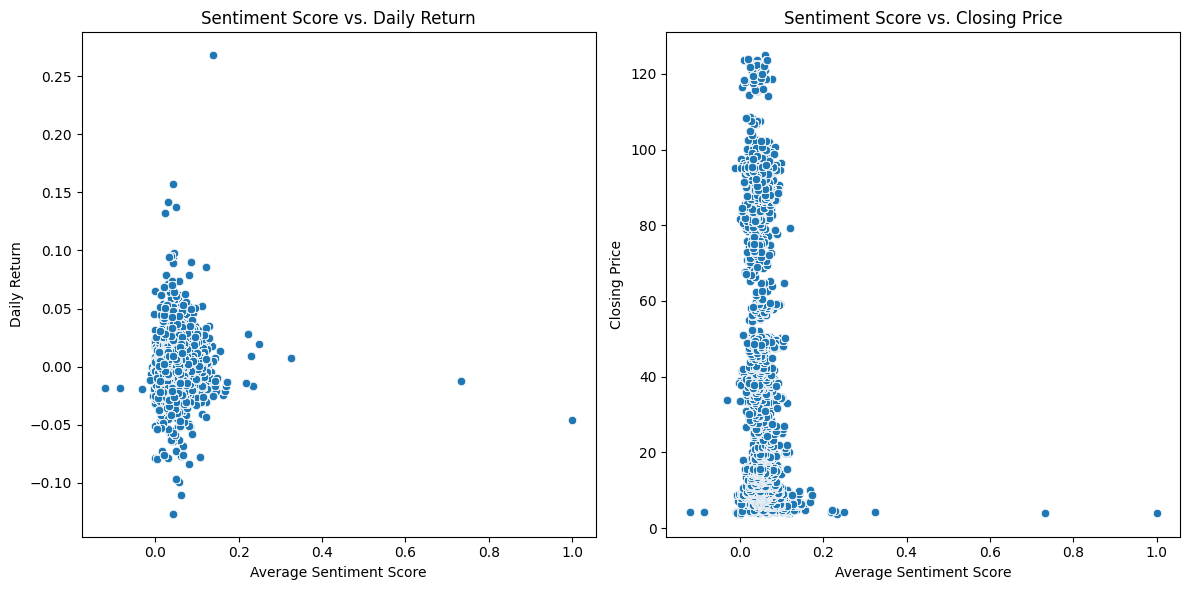

In [ ]:
# Scatter plot for sentiment score vs. daily return
eda.PlotScatter(final_data)

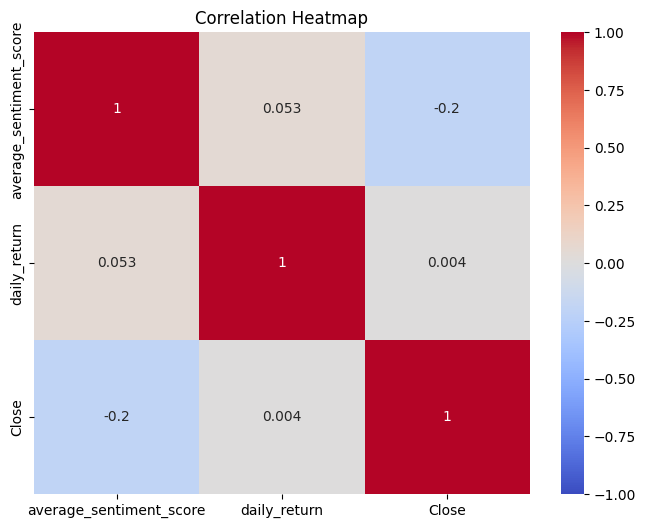

In [ ]:
# Compute correlation matrix
eda.PlotHeatmap(final_data)